<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

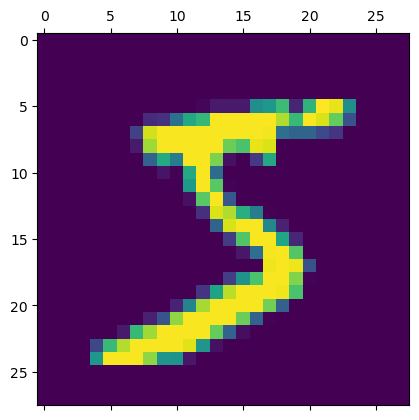

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2666 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1184 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0854 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0506 - accuracy: 0.9846


In [12]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[ 0.02919866, -0.00890847, -0.06737091, ..., -0.04672107,
          0.05798234,  0.05912012],
        [-0.00591426, -0.05144608,  0.03747564, ...,  0.07257646,
          0.04105792,  0.07513015],
        [-0.00742217, -0.05564452,  0.01951305, ..., -0.00027491,
          0.01696891,  0.00611508],
        ...,
        [-0.07019929,  0.06324899,  0.00235588, ...,  0.0381759 ,
         -0.04897179,  0.00839363],
        [ 0.03650251, -0.06396905,  0.02201187, ...,  0.06279637,
          0.06047143,  0.02115158],
        [-0.02688124, -0.03318214, -0.03336008, ...,  0.04756506,
          0.04846671,  0.0556187 ]], dtype=float32),
 array([-0.03231893, -0.04123252,  0.13718487,  0.03164708, -0.01492453,
        -0.01084057,  0.07679241,  0.04496027,  0.08565881,  0.06982323,
         0.21569945,  0.08278927,  0.23847082,  0.05575114,  0.03539028,
        -0.0699224 , -0.00312407, -0.00640346,  0.1311839 ,  0.04454007,
         0.07405014,  0.05069314, -0.13502567,  0.1355717 , -0.064